<a href="https://colab.research.google.com/github/shivam-ai/Journey2AI/blob/master/TensorFlow/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

1.13.0-dev20181121


In [0]:
boston_housing= keras.datasets.boston_housing

In [5]:
(X_train, y_train), (X_test, y_test)= boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [6]:
print(X_train.shape)
print(len(y_train))
print(X_test.shape)
print(len(y_test))

(404, 13)
404
(102, 13)
102


In [8]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [0]:
import pandas as pd

In [0]:
column_names= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

In [11]:
data= pd.DataFrame(X_train, columns= column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [13]:
print(y_train[:10])

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


In [0]:
mean= X_train.mean(axis= 0)
std= X_train.std(axis=0)
X_train= (X_train- mean)/ std
X_test= (X_test- mean)/ std

In [16]:
X_train[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [0]:
def build_model():
  model= keras.Sequential([
      keras.layers.Dense(64, activation= tf.nn.relu, input_shape= (X_train.shape[1],)),
      keras.layers.Dense(64, activation= tf.nn.relu),
      keras.layers.Dense(1)
  ])
  
  optimizer= tf.train.RMSPropOptimizer(0.001)
  
  model.compile(loss= 'mse',
               optimizer= optimizer,
               metrics= ['mae'])
  return model

In [41]:
model= build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if(epoch % 100 == 0):
      print(' ')
    print('.',end=' ')

In [43]:
EPOCH= 500
history= model.fit(X_train, y_train, 
                   epochs= EPOCH, validation_split= 0.2,
                   verbose= 0, callbacks=[PrintDot()])
print(history.history.keys())

 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [0]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
          label= 'Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
          label= 'Val Losss')
  plt.legend()
  plt.ylim([0,5])

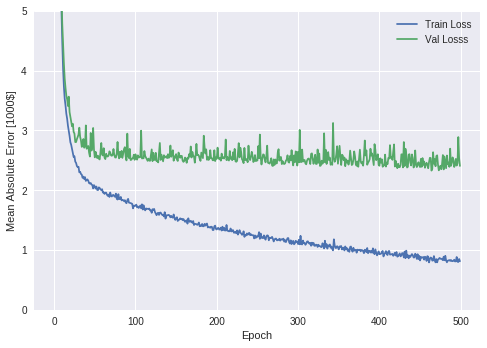

In [45]:
plot_history(history)

 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

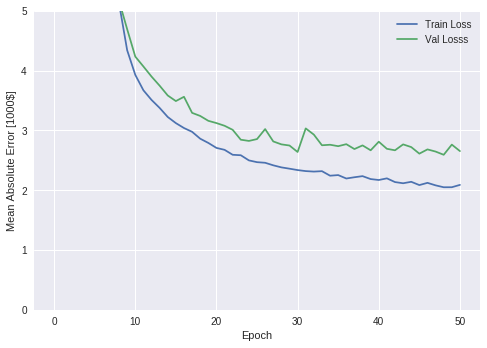

In [46]:
model= build_model()
early_stop= keras.callbacks.EarlyStopping(monitor= 'val_loss', patience= 20)
history= model.fit(X_train, y_train, 
                   epochs= EPOCH, validation_split= 0.2,
                   verbose= 0, callbacks=[early_stop, PrintDot()])
plot_history(history)

In [52]:
[loss, mae]= model.evaluate( X_test, y_test, verbose= 0)
print("Mean Abs error for Testing is ${:7.2f}".format(mae * 1000))

Mean Abs error for Testing is $3237.50


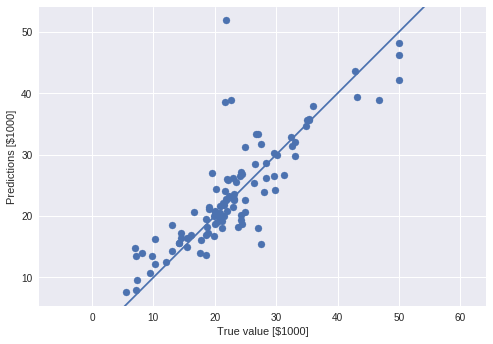

In [55]:
test_predictions= model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True value [$1000]')
plt.ylabel('Predictions [$1000]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])

Text(0,0.5,'Count')

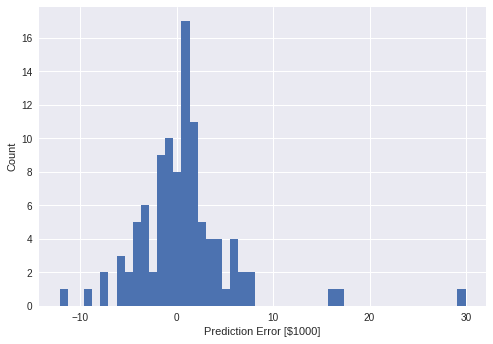

In [56]:
error= test_predictions- y_test
plt.hist(error, bins= 50)
plt.xlabel('Prediction Error [$1000]')
plt.ylabel('Count')

# **DONE**